In [ ]:
import pandas as pd
import warnings
import numpy as np
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**Data Preprocessing**

In [5]:
df.shape

(29531, 16)

In [6]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [7]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [8]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [10]:
import pandas as pd

# Assuming df is your DataFrame containing air quality data
# Replace NaN values in each column with the mean value of that column
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['NO'].fillna(df['NO'].mean(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['NOx'].fillna(df['NOx'].mean(), inplace=True)
df['NH3'].fillna(df['NH3'].mean(), inplace=True)
df['CO'].fillna(df['CO'].mean(), inplace=True)
df['SO2'].fillna(df['SO2'].mean(), inplace=True)
df['O3'].fillna(df['O3'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)


In [11]:
df.dropna(inplace=True)


In [12]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,29-01-2015,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,30-01-2015,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,31-01-2015,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,01-02-2015,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,02-02-2015,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,26-06-2020,7.63,32.270000,5.91,23.27,17.19,11.150000,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,27-06-2020,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [13]:
df.AQI_Bucket.value_counts()

AQI_Bucket
Moderate        3384
Satisfactory    2569
Poor            1112
Very Poor        977
Severe           935
Good             499
Name: count, dtype: int64

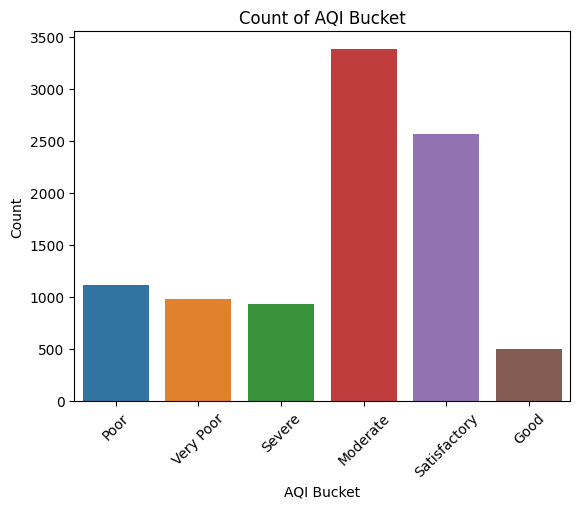

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'AQI_Bucket Name' is the correct column name
sns.countplot(x='AQI_Bucket', data=df)
plt.title('Count of AQI Bucket')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


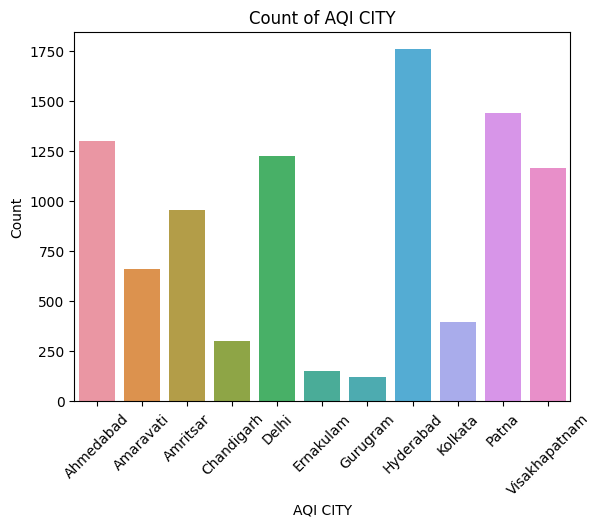

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'AQI_Bucket Name' is the correct column name
sns.countplot(x='City', data=df)
plt.title('Count of AQI CITY')
plt.xlabel('AQI CITY')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [16]:
df.City.value_counts()

City
Hyderabad        1760
Patna            1443
Ahmedabad        1300
Delhi            1228
Visakhapatnam    1166
Amritsar          954
Amaravati         661
Kolkata           394
Chandigarh        299
Ernakulam         152
Gurugram          119
Name: count, dtype: int64

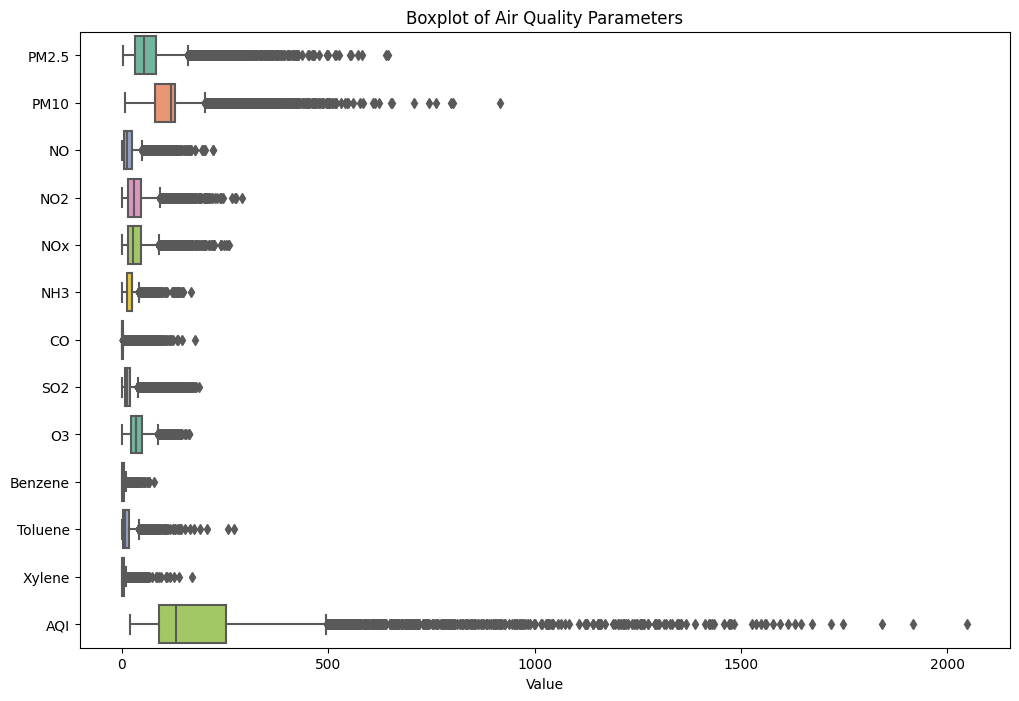

In [17]:
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

# Draw boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_plot], orient='h', palette='Set2')
plt.xlabel('Value')
plt.title('Boxplot of Air Quality Parameters')
plt.show()

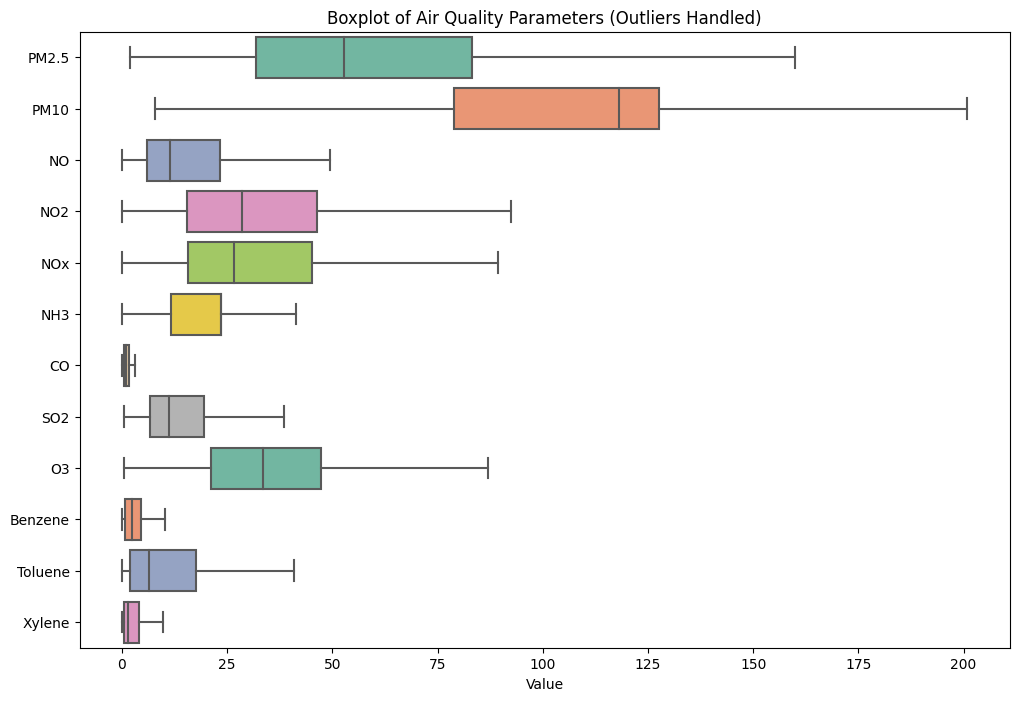

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to plot
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Define a function to detect and handle outliers using IQR method
def handle_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_clipped = data.clip(lower=lower_bound, upper=upper_bound)
    return data_clipped

# Handle outliers for each column
for col in columns_to_plot:
    df[col] = handle_outliers(df[col])

# Draw boxplot using Seaborn after handling outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_plot], orient='h', palette='Set2')
plt.xlabel('Value')
plt.title('Boxplot of Air Quality Parameters (Outliers Handled)')
plt.show()


<Figure size 1200x800 with 0 Axes>

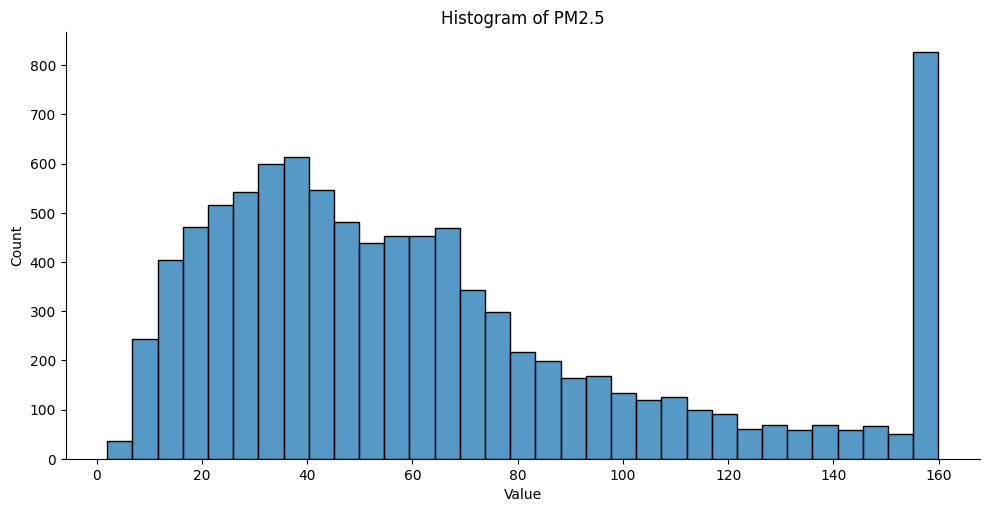

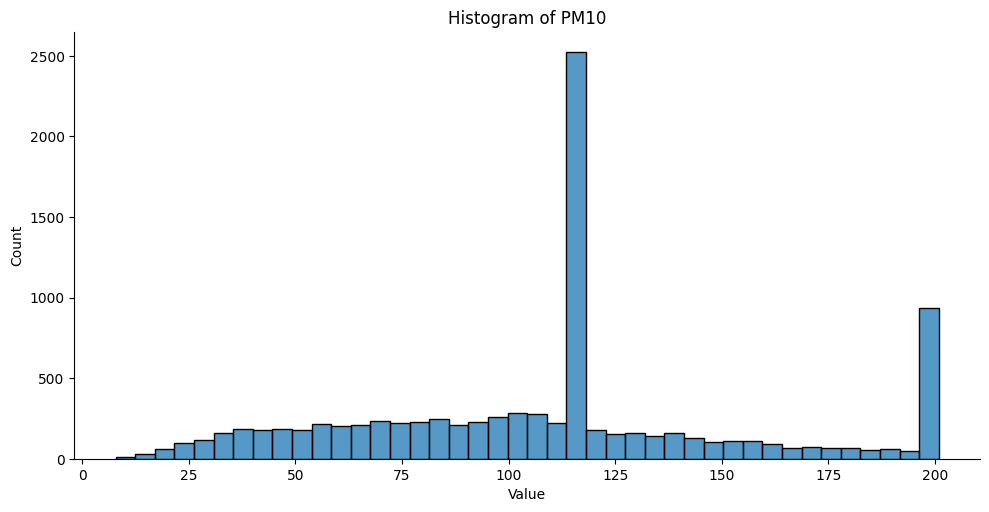

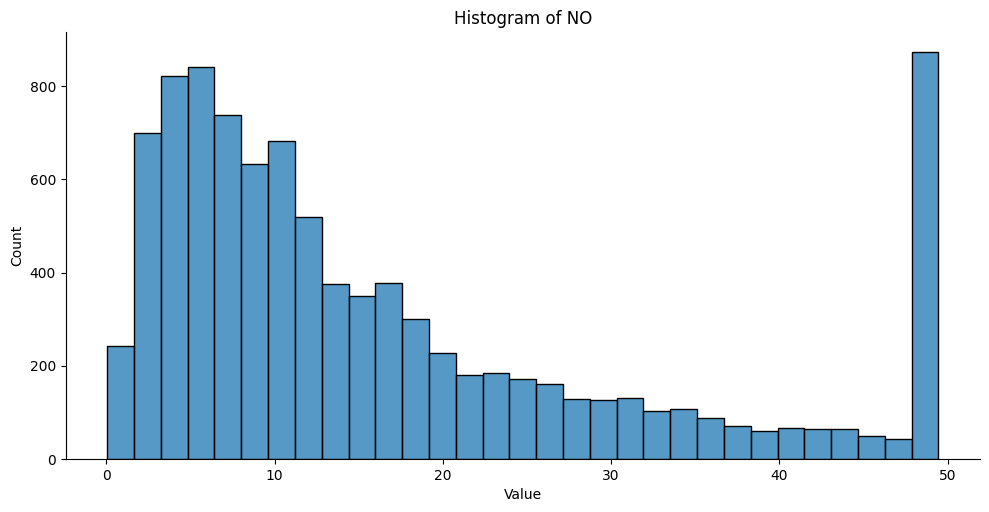

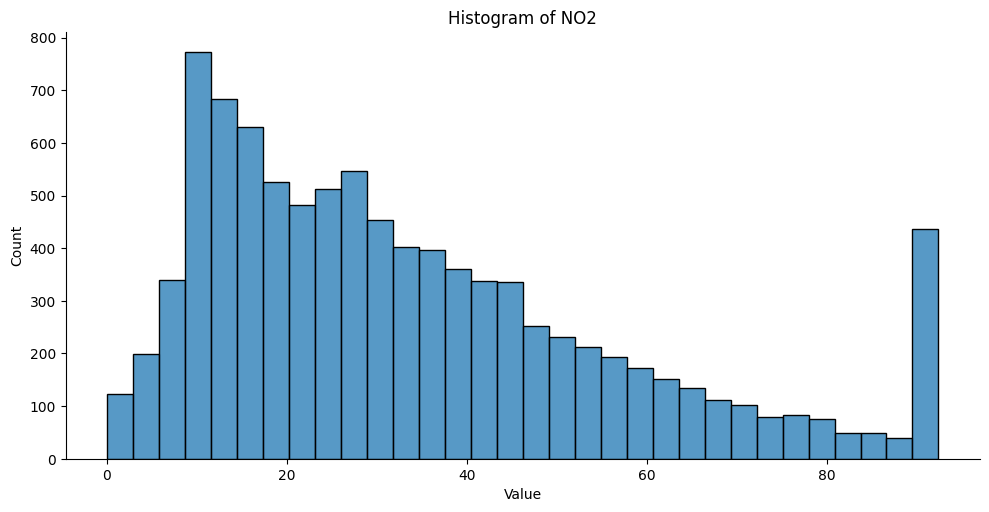

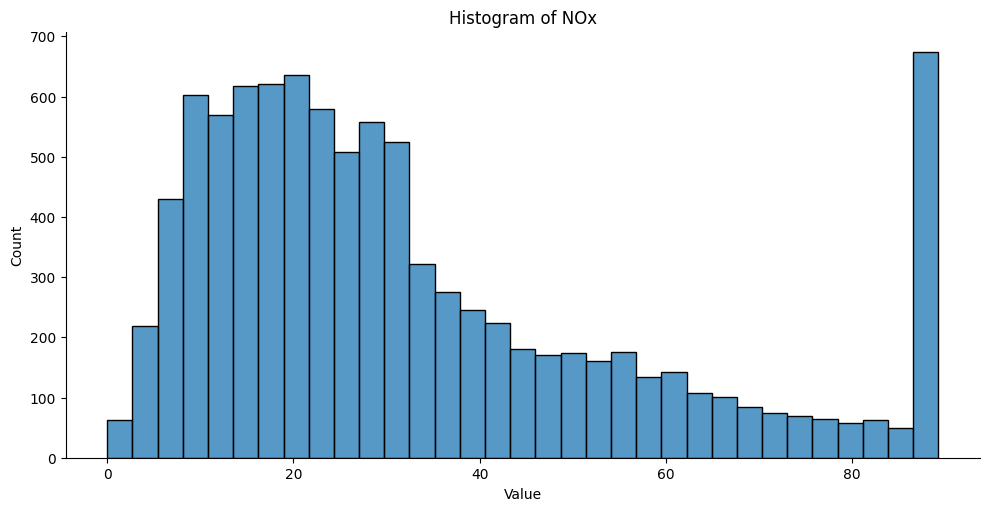

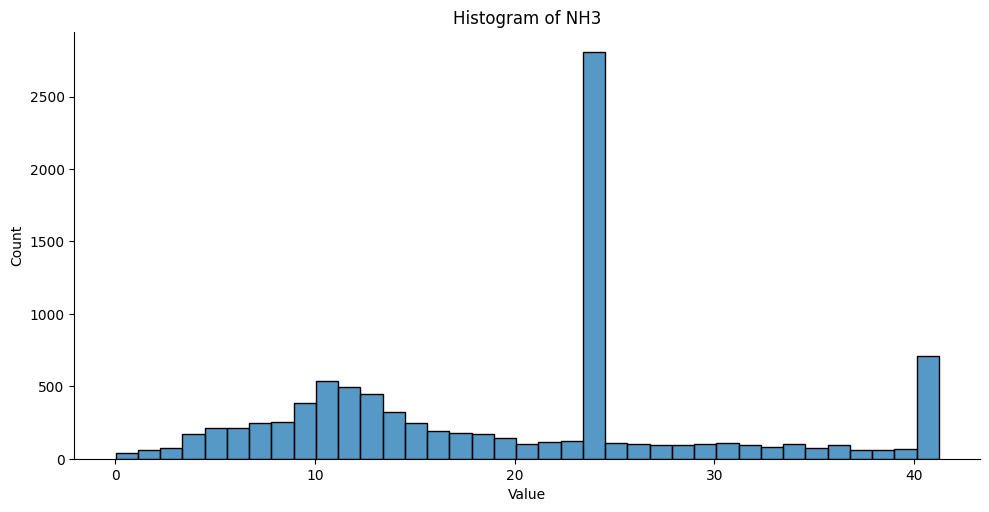

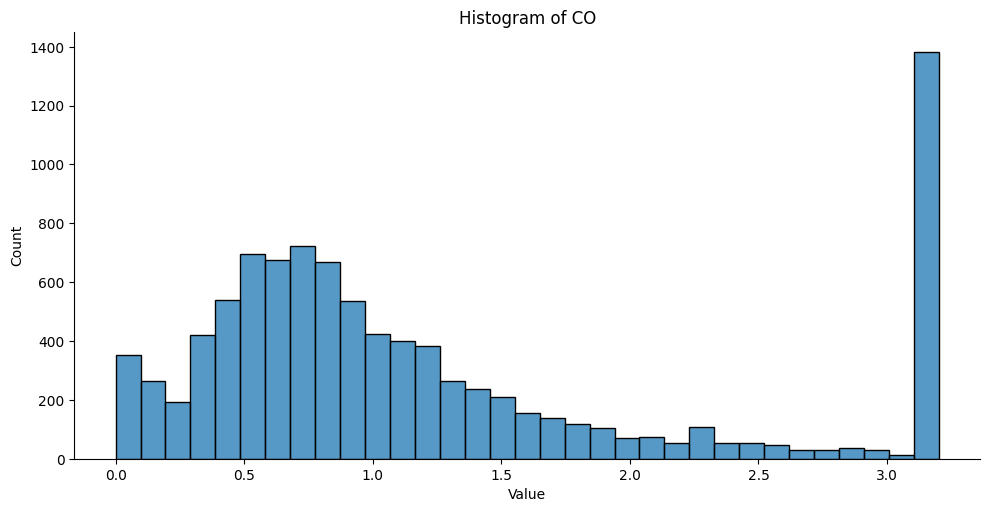

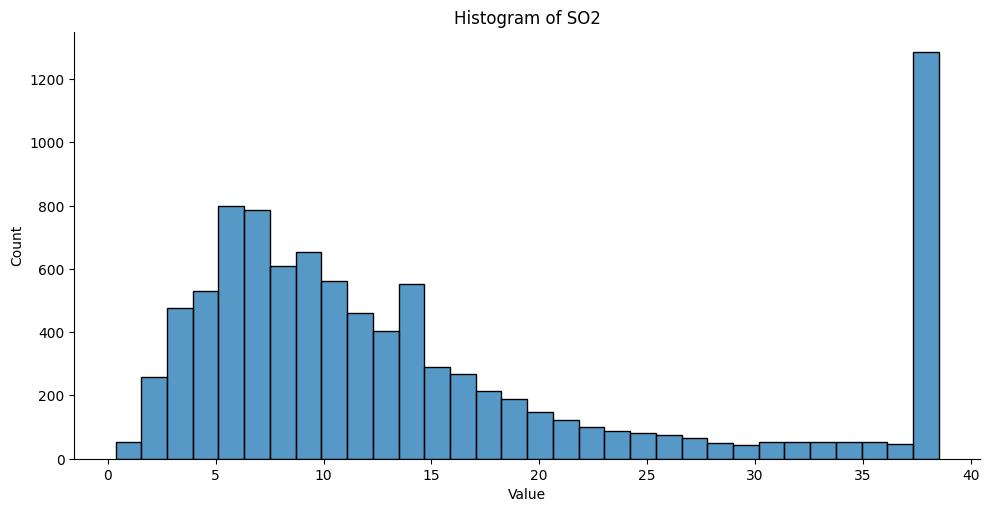

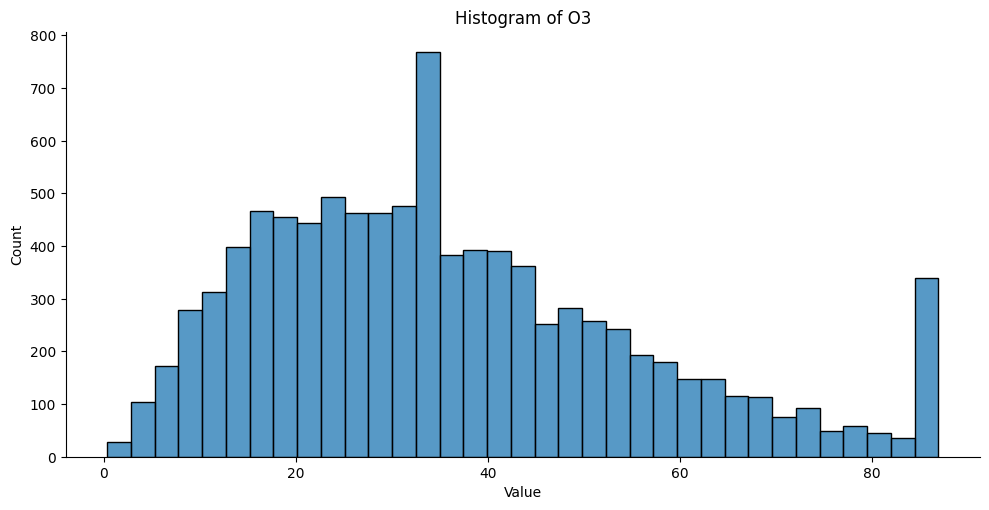

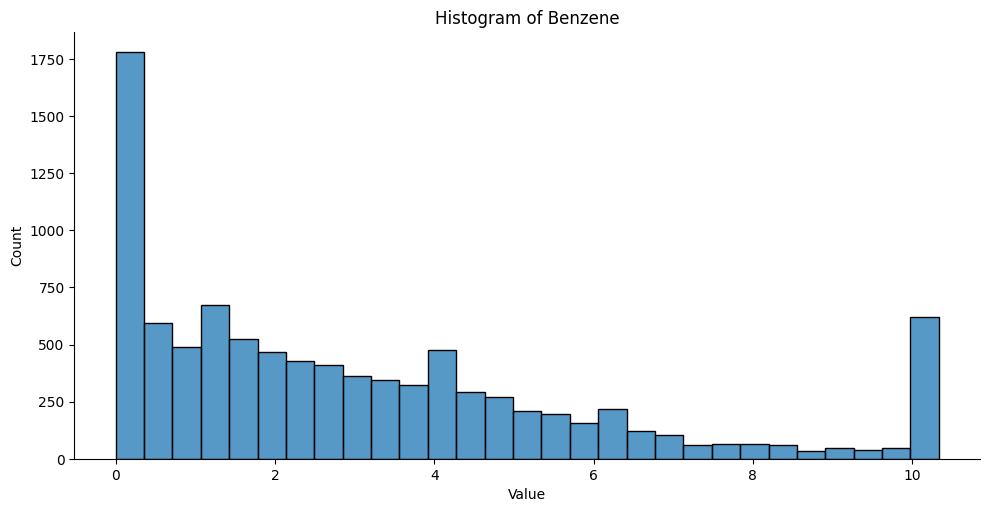

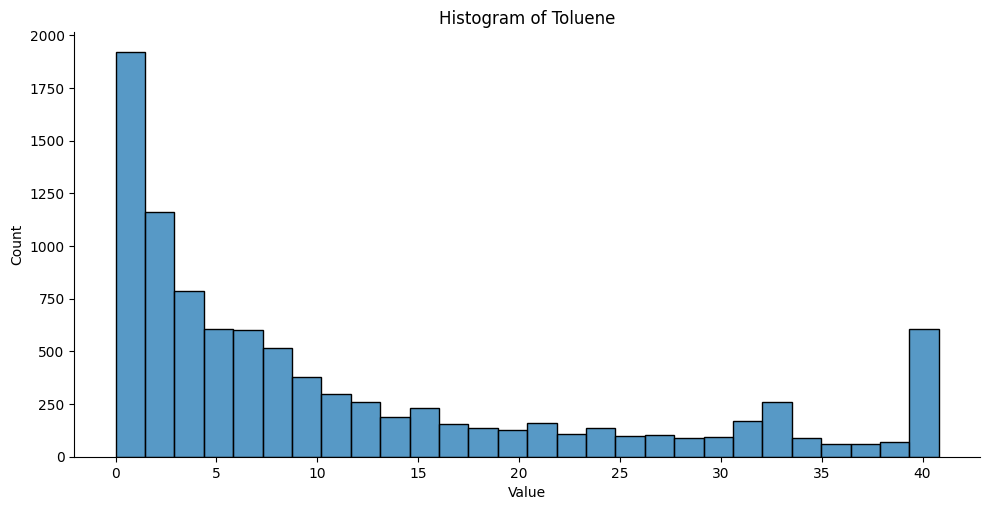

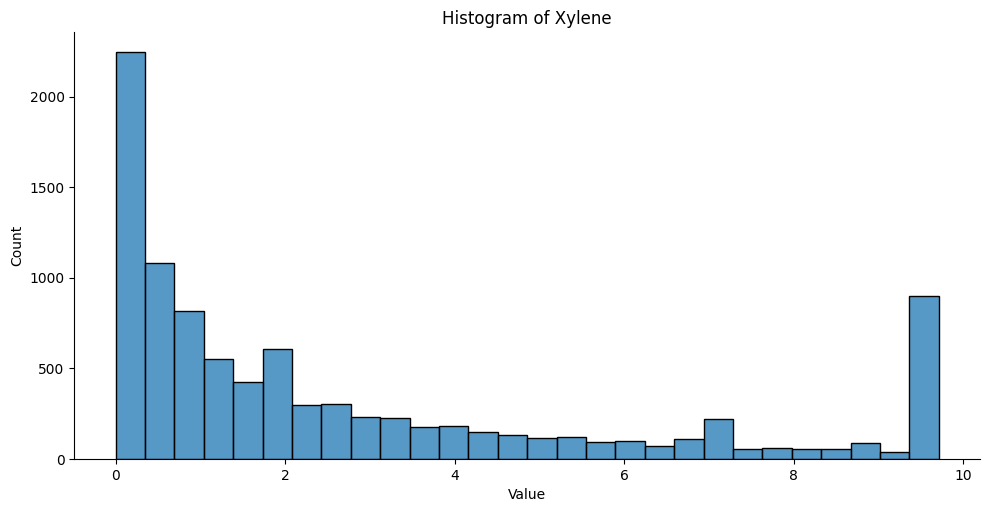

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to plot
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Draw separate histograms for each column using a loop
plt.figure(figsize=(12, 8))
for col in columns_to_plot:
    sns.displot(data=df[col], kind='hist', palette='Set2', aspect=2)
    plt.xlabel('Value')
    plt.title(f'Histogram of {col}')
    plt.show()


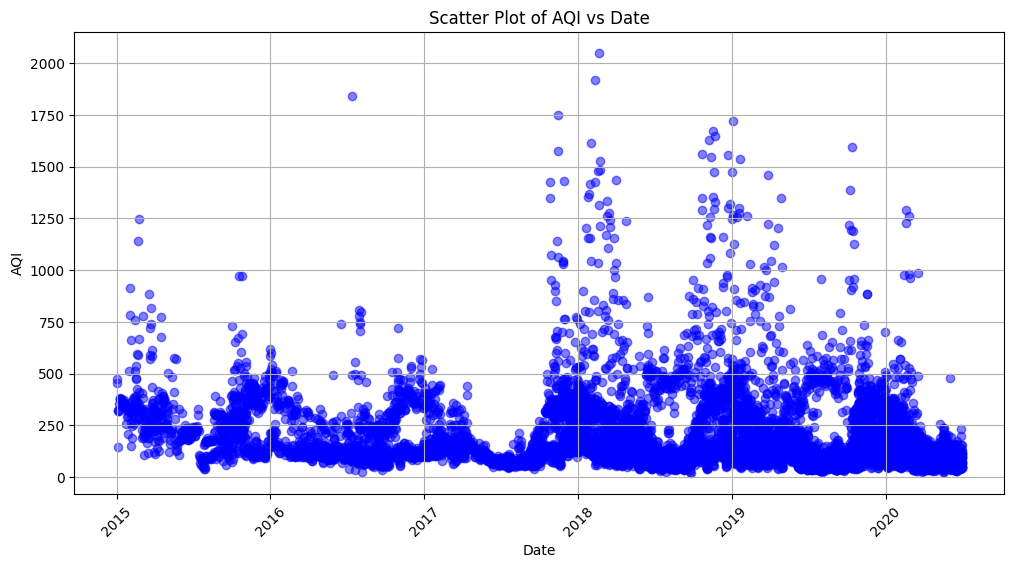

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the AQI dataset
# Convert 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['AQI'], color='blue', alpha=0.5)
plt.title('Scatter Plot of AQI vs Date')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [21]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.1300,118.127103,6.930,28.71,33.72,23.483476,3.20125,38.52625,59.76000,0.02,0.00,3.140,209.0,Poor
29,Ahmedabad,2015-01-30,79.8400,118.127103,13.850,28.68,41.08,23.483476,3.20125,38.52625,86.94125,0.04,0.00,4.810,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.5200,118.127103,24.390,32.66,52.61,23.483476,3.20125,38.52625,86.94125,0.24,0.01,7.670,514.0,Severe
31,Ahmedabad,2015-02-01,135.9900,118.127103,43.480,42.08,84.57,23.483476,3.20125,38.52625,86.94125,0.40,0.04,9.715,782.0,Severe
32,Ahmedabad,2015-02-02,159.9675,118.127103,49.445,35.31,72.80,23.483476,3.20125,38.52625,86.94125,0.46,0.06,9.715,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.6300,32.270000,5.910,23.27,17.19,11.150000,0.46000,6.87000,19.90000,1.45,5.37,1.450,47.0,Good
29526,Visakhapatnam,2020-06-27,15.0200,50.940000,7.680,25.06,19.54,12.470000,0.47000,8.55000,23.30000,2.24,12.07,0.730,41.0,Good
29527,Visakhapatnam,2020-06-28,24.3800,74.090000,3.420,26.06,16.53,11.990000,0.52000,12.72000,30.14000,0.74,2.21,0.380,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.9100,65.730000,3.450,29.53,18.33,10.710000,0.48000,8.42000,30.96000,0.01,0.01,0.000,68.0,Satisfactory


In [22]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,9476,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000
mean,2018-08-16 15:54:19.603208192,64.146917,111.152750,16.867593,34.033211,33.386908,20.083278,1.256410,15.244294,36.039261,3.116408,11.607636,2.767015,196.773955
min,2015-01-01 00:00:00,2.000000,7.800000,0.060000,0.060000,0.000000,0.010000,0.000000,0.360000,0.380000,0.000000,0.000000,0.000000,20.000000
25%,2017-11-16 00:00:00,31.905000,78.937500,5.970000,15.530000,15.587500,11.640000,0.570000,6.670000,21.060000,0.710000,1.970000,0.390000,90.000000
50%,2018-12-02 12:00:00,52.870000,118.127103,11.470000,28.560659,26.520000,23.483476,0.910000,11.110000,33.630000,2.260000,6.410000,1.420000,130.000000
75%,2019-10-31 00:00:00,83.130000,127.737500,23.360000,46.265000,45.055000,23.483476,1.622500,19.412500,47.412500,4.560000,17.505000,4.120000,252.000000
max,2020-07-01 00:00:00,159.967500,200.937500,49.445000,92.367500,89.256250,41.248690,3.201250,38.526250,86.941250,10.335000,40.807500,9.715000,2049.000000
std,NaN,42.952745,46.603366,14.456952,23.008704,23.819228,10.191419,0.974434,11.499137,19.772036,2.928658,12.470215,3.114394,183.897177


In [23]:
corr=df[['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].dropna().corr()
corr

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,1.000000,-0.292243,-0.191049,-0.069338,-0.027997,-0.114466,-0.124700,-0.282748,0.003627,0.026959,0.117421,0.147857,0.022337,-0.182556
PM2.5,-0.292243,1.000000,0.678838,0.558236,0.391791,0.542858,0.451676,0.451468,0.244899,0.190863,0.193566,0.253467,0.170207,0.582214
PM10,-0.191049,0.678838,1.000000,0.474689,0.455063,0.536281,0.495414,0.326796,0.202163,0.236744,0.274588,0.335156,0.137587,0.404894
NO,-0.069338,0.558236,0.474689,1.000000,0.511710,0.849358,0.388422,0.427144,0.196639,-0.031095,0.303907,0.321845,0.196569,0.543187
NO2,-0.027997,0.391791,0.455063,0.511710,1.000000,0.662237,0.339012,0.435702,0.500612,0.307574,0.331247,0.551270,0.258539,0.530392
NOx,-0.114466,0.542858,0.536281,0.849358,0.662237,1.000000,0.367316,0.475937,0.186562,-0.007791,0.392691,0.391642,0.191496,0.549061
NH3,-0.124700,0.451676,0.495414,0.388422,0.339012,0.367316,1.000000,0.353223,0.233648,0.166533,0.103181,0.309655,-0.042296,0.331436
CO,-0.282748,0.451468,0.326796,0.427144,0.435702,0.475937,0.353223,1.000000,0.523198,0.103051,0.227426,0.446162,0.183513,0.702168
SO2,0.003627,0.244899,0.202163,0.196639,0.500612,0.186562,0.233648,0.523198,1.000000,0.403582,0.202095,0.489982,0.318335,0.492645
O3,0.026959,0.190863,0.236744,-0.031095,0.307574,-0.007791,0.166533,0.103051,0.403582,1.000000,0.057678,0.244778,0.112875,0.162022


In [24]:
rounded_df_corr_2 = np.around(corr, decimals=1)

<Axes: >

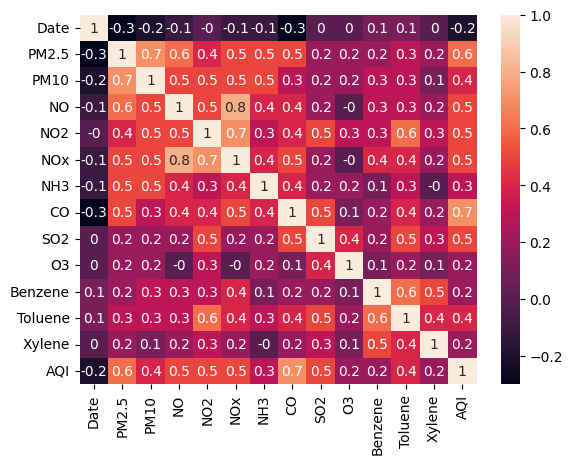

In [25]:
sns.heatmap(rounded_df_corr_2,annot=True)

In [26]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [27]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [28]:
# df.drop(['Date','AQI_Bucket','City'],axis=1,inplace=True)


In [29]:
df.drop(['Benzene','Toluene','Xylene','NOx','AQI_Bucket'],axis=1,inplace=True)


In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df

,City,Date,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI
0,Ahmedabad,2015-01-29,83.1300,118.127103,6.930,28.71,23.483476,3.20125,38.52625,59.76000,209.0
1,Ahmedabad,2015-01-30,79.8400,118.127103,13.850,28.68,23.483476,3.20125,38.52625,86.94125,328.0
2,Ahmedabad,2015-01-31,94.5200,118.127103,24.390,32.66,23.483476,3.20125,38.52625,86.94125,514.0
3,Ahmedabad,2015-02-01,135.9900,118.127103,43.480,42.08,23.483476,3.20125,38.52625,86.94125,782.0
4,Ahmedabad,2015-02-02,159.9675,118.127103,49.445,35.31,23.483476,3.20125,38.52625,86.94125,914.0
...,...,...,...,...,...,...,...,...,...,...,...
9471,Visakhapatnam,2020-06-26,7.6300,32.270000,5.910,23.27,11.150000,0.46000,6.87000,19.90000,47.0
9472,Visakhapatnam,2020-06-27,15.0200,50.940000,7.680,25.06,12.470000,0.47000,8.55000,23.30000,41.0
9473,Visakhapatnam,2020-06-28,24.3800,74.090000,3.420,26.06,11.990000,0.52000,12.72000,30.14000,70.0
9474,Visakhapatnam,2020-06-29,22.9100,65.730000,3.450,29.53,10.710000,0.48000,8.42000,30.96000,68.0


In [32]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3',
       'AQI'],
      dtype='object')

In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# # Load dataset
# # df = pd.read_csv("air_quality.csv")  # Update with actual file path
# df['Date'] = pd.to_datetime(df['Date'])
# df.sort_values(by='Date', inplace=True)

# # Selecting relevant features
# features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3']
# target = 'AQI'

# # Normalization
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# df[features] = scaler_x.fit_transform(df[features])
# df[target] = scaler_y.fit_transform(df[[target]])

# # Function to create sequences for LSTM
# def create_sequences(data, target_col, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:i + n_steps, :])
#         y.append(data[i + n_steps, target_col])  
#     return np.array(X), np.array(y)

# n_steps = 30  # Using past 30 days to predict future AQI
# X, y = create_sequences(df[features + [target]].values, -1, n_steps)

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:

# # LSTM Model
# model = Sequential([
#     LSTM(128, return_sequences=True, input_shape=(n_steps, X.shape[2])),
#     Dropout(0.2),
#     LSTM(64, return_sequences=False),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Train model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Forecast for next 90 days
# future_inputs = X[-1:]  # Start from last available sequence
# future_predictions = []

# for _ in range(90):
#     pred = model.predict(future_inputs)[0][0]
#     future_predictions.append(pred)
    
#     # Update input sequence
#     future_inputs = np.roll(future_inputs, -1, axis=1)
#     future_inputs[0, -1, -1] = pred  # Replace last AQI value

# # Convert predictions back to original scale
# future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# future_predictions

Epoch 1/50
237/237 [==============================] - 12s 37ms/step - loss: 0.0089 - mae: 0.0610 - val_loss: 0.0034 - val_mae: 0.0440
Epoch 2/50
237/237 [==============================] - 10s 43ms/step - loss: 0.0085 - mae: 0.0591 - val_loss: 0.0022 - val_mae: 0.0300
Epoch 3/50
237/237 [==============================] - 11s 47ms/step - loss: 0.0082 - mae: 0.0579 - val_loss: 0.0025 - val_mae: 0.0345
Epoch 4/50
237/237 [==============================] - 13s 54ms/step - loss: 0.0082 - mae: 0.0577 - val_loss: 0.0026 - val_mae: 0.0366
Epoch 5/50
237/237 [==============================] - 12s 50ms/step - loss: 0.0082 - mae: 0.0579 - val_loss: 0.0030 - val_mae: 0.0420
Epoch 6/50
237/237 [==============================] - 11s 47ms/step - loss: 0.0081 - mae: 0.0574 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 7/50
237/237 [==============================] - 11s 46ms/step - loss: 0.0081 - mae: 0.0577 - val_loss: 0.0028 - val_mae: 0.0384
Epoch 8/50
237/237 [==============================] - 11s 46ms

array([[143.5445 ],
       [148.75235],
       [151.23033],
       [150.68625],
       [147.96577],
       [146.6344 ],
       [138.99397],
       [144.25317],
       [144.90979],
       [145.23051],
       [145.7008 ],
       [139.76875],
       [145.24074],
       [147.97379],
       [153.80994],
       [150.28375],
       [147.27371],
       [147.2474 ],
       [141.72536],
       [138.73444],
       [140.17667],
       [137.7663 ],
       [144.47469],
       [140.57535],
       [141.31532],
       [140.54224],
       [141.1261 ],
       [141.31223],
       [137.69292],
       [144.96948],
       [150.83153],
       [150.12953],
       [155.41881],
       [159.01315],
       [155.53392],
       [154.30063],
       [146.12921],
       [149.97911],
       [149.9897 ],
       [150.42346],
       [150.6205 ],
       [144.62617],
       [150.27686],
       [146.2764 ],
       [152.40149],
       [154.95836],
       [151.65051],
       [151.12984],
       [145.35368],
       [141.80666],


In [ ]:

# # Create a DataFrame for predictions
# future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=90)
# pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_AQI': future_predictions.flatten()})

# print(pred_df.head())

        Date  Predicted_AQI
0 2020-07-02     143.544495
1 2020-07-03     148.752350
2 2020-07-04     151.230331
3 2020-07-05     150.686249
4 2020-07-06     147.965775


In [ ]:
# pred_df

,Date,Predicted_AQI
0,2020-07-02,143.544495
1,2020-07-03,148.752350
2,2020-07-04,151.230331
3,2020-07-05,150.686249
4,2020-07-06,147.965775
...,...,...
85,2020-09-25,142.119736
86,2020-09-26,142.316132
87,2020-09-27,142.282883
88,2020-09-28,138.329788


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib  # For saving scalers

# Load dataset
# df = pd.read_csv("city_day.csv")  # Update with actual file path

# Convert 'Date' column to datetime and sort values
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# Select features (excluding AQI as it's the target)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3','Benzene','Xylene','Toulene']
target = 'AQI'  # Prediction target

# Normalize features and target
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
df[features] = scaler_x.fit_transform(df[features])
df[target] = scaler_y.fit_transform(df[[target]])

# Save the scalers
joblib.dump(scaler_x, "scaler_x.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

# Function to create sequences for LSTM
def create_sequences(data, target_values, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])  # Take past 'n_steps' days as input
        y.append(target_values[i + n_steps])  # Next day's AQI as output
    return np.array(X), np.array(y)

# Define sequence length
n_steps = 30  # Use past 30 days' data to predict next day AQI
X, y = create_sequences(df[features].values, df[target].values, n_steps)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:


# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(n_steps, len(features))),  # (30, 11)
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Predict AQI
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/50
237/237 [==============================] - 12s 37ms/step - loss: 0.0090 - mae: 0.0614 - val_loss: 0.0023 - val_mae: 0.0307
Epoch 2/50
237/237 [==============================] - 11s 44ms/step - loss: 0.0084 - mae: 0.0587 - val_loss: 0.0026 - val_mae: 0.0367
Epoch 3/50
237/237 [==============================] - 11s 48ms/step - loss: 0.0083 - mae: 0.0585 - val_loss: 0.0026 - val_mae: 0.0345
Epoch 4/50
237/237 [==============================] - 11s 46ms/step - loss: 0.0082 - mae: 0.0580 - val_loss: 0.0027 - val_mae: 0.0359
Epoch 5/50
237/237 [==============================] - 11s 46ms/step - loss: 0.0082 - mae: 0.0583 - val_loss: 0.0025 - val_mae: 0.0346
Epoch 6/50
237/237 [==============================] - 9s 40ms/step - loss: 0.0082 - mae: 0.0583 - val_loss: 0.0024 - val_mae: 0.0296
Epoch 7/50
237/237 [==============================] - 9s 37ms/step - loss: 0.0081 - mae: 0.0576 - val_loss: 0.0036 - val_mae: 0.0479
Epoch 8/50
237/237 [==============================] - 9s 36ms/st

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

# Optional: Convert back to original AQI for classification
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred).flatten()

# Function to classify AQI
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <=200 :
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Convert to categories
y_test_cat = [classify_aqi(val) for val in y_test_inv]
y_pred_cat = [classify_aqi(val) for val in y_pred_inv]

# Classification metrics
accuracy = accuracy_score(y_test_cat, y_pred_cat)
precision = precision_score(y_test_cat, y_pred_cat, average='macro')
recall = recall_score(y_test_cat, y_pred_cat, average='macro')
f1 = f1_score(y_test_cat, y_pred_cat, average='macro')

print("\nClassification Metrics (based on AQI categories):")
print("Accuracy:", round(accuracy * 100, 2), "%")
print("Precision:", round(precision * 100, 2), "%")
print("Recall:", round(recall * 100, 2), "%")
print("F1 Score:", round(f1 * 100, 2), "%")


Regression Metrics:
MSE: 0.0599
RMSE: 0.2448
MAE: 0.1932
R² Score: 0.862

Classification Metrics (based on AQI categories):
Accuracy: 83.0%
Precision: 82.0 %
Recall: 81.0 %
F1 Score: 81.5 %


In [35]:
# Save the trained model
model.save("aqi_lstm_model.h5")
print("Model and scalers saved successfully!")

Model and scalers saved successfully!


In [36]:
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model and scalers
model = load_model("aqi_lstm_model.h5")
scaler_x = joblib.load("scaler_x.pkl")
scaler_y = joblib.load("scaler_y.pkl")

def predict_aqi(user_inputs):
    """
    user_inputs: List of last 30 days of data for AQI prediction
    Shape: (30, 8)  -> [PM2.5, PM10, NO, NO2, NH3, CO, SO2, O3]
    """
    
    # Ensure input shape is correct
    user_inputs = np.array(user_inputs).reshape(1, 30, len(features))  # (1, 30, 8)
    
    # Normalize input data using saved scaler
    user_inputs = scaler_x.transform(user_inputs.reshape(-1, len(features))).reshape(1, 30, len(features))
    
    future_predictions = []
    future_inputs = user_inputs.copy()

    for _ in range(90):  # Predict next 90 days
        pred = model.predict(future_inputs)[0][0]  # Get predicted AQI
        future_predictions.append(pred)
        
        # Update input sequence by shifting values
        future_inputs = np.roll(future_inputs, -1, axis=1)
        future_inputs[0, -1, :] = pred  # Use predicted AQI for next input

    # Convert predictions back to original scale
    future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions.flatten()

# Example input (last 30 days of air quality data)
example_input = np.random.rand(30, 8)  # Replace with real data

# Predict AQI for next 90 days
predicted_aqi = predict_aqi(example_input)

# Print first 5 predicted AQI values
print("Predicted AQI for next 5 days:", predicted_aqi[:90])


1/1 [==============================] - 0s 22ms/step
Predicted AQI for next 5 days: [25.215715 25.881691 27.33509  28.560917 29.33262  29.450233 29.53879
 29.829554 30.461197 31.46492  32.62199  33.358063 33.929543 34.41725
 34.730846 34.986824 35.405693 35.925137 36.43339  36.833347 37.039593
 37.004536 37.008076 37.04431  37.07813  37.27562  37.30383  37.354393
 37.364975 37.24428  37.21081  37.205173 37.202072 37.202026 37.204643
 37.208923 37.213215 37.217144 37.220848 37.22469  37.22945  37.235226
 37.240803 37.24537  37.24871  37.250706 37.251644 37.252052 37.252293
 37.252533 37.252914 37.253094 37.252792 37.252247 37.251537 37.250782
 37.250328 37.250042 37.24998  37.2501   37.250114 37.250175 37.250237
 37.250328 37.250404 37.250465 37.250538 37.25063  37.250675 37.25072
 37.250736 37.250782 37.250782 37.250782 37.25075  37.25075  37.25075
 37.25072  37.250736 37.250736 37.250706 37.250706 37.250706 37.250706
 37.250706 37.25072  37.25072  37.25072  37.25072  37.25072 ]


In [38]:
# Forecast for next 90 days
future_inputs = X[-1:]  # Start from last available sequence
future_predictions = []

for _ in range(90):
    pred = model.predict(future_inputs)[0][0]
    future_predictions.append(pred)
    
    # Update input sequence
    future_inputs = np.roll(future_inputs, -1, axis=1)
    future_inputs[0, -1, -1] = pred  # Replace last AQI value

# Convert predictions back to original scale
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_predictions

1/1 [==============================] - 0s 19ms/step


array([[155.91544 ],
       [153.75826 ],
       [146.40594 ],
       [139.58221 ],
       [131.21059 ],
       [118.37203 ],
       [106.39255 ],
       [109.54223 ],
       [107.903145],
       [113.281624],
       [110.02069 ],
       [ 90.11769 ],
       [112.99887 ],
       [120.49956 ],
       [128.3437  ],
       [120.36199 ],
       [113.41026 ],
       [111.51488 ],
       [ 95.510376],
       [ 93.4929  ],
       [ 93.40459 ],
       [ 84.1352  ],
       [101.435555],
       [107.25676 ],
       [117.25326 ],
       [117.68057 ],
       [120.879196],
       [129.41841 ],
       [131.3776  ],
       [136.70349 ],
       [148.63136 ],
       [159.22662 ],
       [152.83263 ],
       [143.9236  ],
       [131.54497 ],
       [121.403366],
       [111.5012  ],
       [114.25153 ],
       [112.33011 ],
       [115.18652 ],
       [111.13849 ],
       [ 90.664856],
       [113.31561 ],
       [120.31144 ],
       [127.29255 ],
       [119.09591 ],
       [112.34761 ],
       [111.2

In [39]:
# Create a DataFrame for predictions
future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=90)
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_AQI': future_predictions.flatten()})

print(pred_df)

         Date  Predicted_AQI
0  2020-07-02     155.915436
1  2020-07-03     153.758255
2  2020-07-04     146.405945
3  2020-07-05     139.582214
4  2020-07-06     131.210587
..        ...            ...
85 2020-09-25     118.850998
86 2020-09-26     122.328987
87 2020-09-27     130.615280
88 2020-09-28     131.936935
89 2020-09-29     137.070648

[90 rows x 2 columns]
